In [58]:
import numpy as np
import matplotlib.pyplot as plt 

# Quiz

**3.**

El resultado combinado lo reportamos usando el promedio ponderado:

In [59]:
data = [6.33, 6.22, 6.44, 6.31, 6.31, 6.26]
error = [0.01, 0.03, 0.06, 0.06, 0.02, 0.05]
pesos = 1 / (np.array(error)**2)

promedio = np.sum(np.array(data)*pesos)/np.sum(pesos)
promedio_error = np.sqrt(1 / np.sum(pesos))

print('Resultado combinado: '+ str(np.round(promedio,3)) + ' ± ' + str(np.round(promedio_error,3)))

Resultado combinado: 6.318 ± 0.008


Agregando (6.4 +/- 0.2) se obtiene:

In [60]:
data.append(6.4)
error.append(0.2)

pesos = 1 / (np.array(error)**2)
promedio = np.sum(np.array(data)*pesos)/np.sum(pesos)
promedio_error = np.sqrt(1 / np.sum(pesos))

print('Resultado combinado: '+ str(np.round(promedio,3)) + ' ± ' + str(np.round(promedio_error,3)))

Resultado combinado: 6.318 ± 0.008


No cambió. 
Ahora agregamos (7.01 +/- 0.04):

In [61]:
data.append(7.01)
error.append(0.04)

pesos = 1 / (np.array(error)**2)
promedio = np.sum(np.array(data)*pesos)/np.sum(pesos)
promedio_error = np.sqrt(1 / np.sum(pesos))

print('Resultado combinado: '+ str(np.round(promedio,3)) + ' ± ' + str(np.round(promedio_error,3)))

Resultado combinado: 6.347 ± 0.008


Si cambió

**4.**

In [62]:
def unweighted_fit(x,y):
    
    sum_x2 = np.sum(x**2)
    sum_y = np.sum(y)
    sum_x = np.sum(x)
    sum_xy = np.sum(x*y)
    N = len(x)
    Delta = (N * sum_x2) - sum_x**2
    
    m = (N * sum_xy - sum_x * sum_y) / Delta
    c = (sum_x2 * sum_y - sum_x * sum_xy) / Delta
    
    CU = np.sqrt( (1/(N-2)) * np.sum((y - m*x - c)**2) )
    m_err = CU * np.sqrt(N / Delta)
    c_err = CU * np.sqrt(sum_x2 / Delta)
    
    return (m,c) , (m_err,c_err)

def weighted_fit(x,y,e):
    
    w = 1/(e**2)
    sum_w = np.sum(w)
    sum_x2 = np.sum(w*x**2)
    sum_y = np.sum(w*y)
    sum_x = np.sum(w*x)
    sum_xy = np.sum(w*x*y)
    Delta = sum_w*sum_x2 - sum_x**2
    
    m = (sum_w*sum_xy - sum_x*sum_y)/Delta
    b = (sum_x2*sum_y - sum_x*sum_xy)/Delta
    
    m_err = np.sqrt(sum_w/Delta)
    b_err = np.sqrt(sum_x2/Delta)
    
    return (m,b) , (m_err,b_err) 

Ecuación de la recta: v = 9.7 t + 0.005
R^2 = 0.999


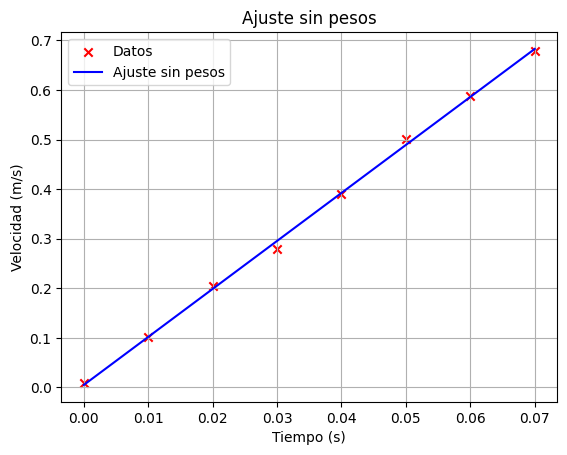

In [63]:
t = np.array([0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07])
v = np.array([0.008, 0.101, 0.204, 0.279, 0.391, 0.501, 0.588, 0.679])
error = np.array([0.001, 0.001, 0.001, 0.001, 0.005, 0.001, 0.001, 0.005])

param, param_err = unweighted_fit(t,v)
promedio = np.sum(v)/len(v)
modelo = param[0]*t + param[1]
R_cuadrado = 1 - (np.sum((v - modelo)**2) / np.sum((v - promedio)**2))

print('Ecuación de la recta: v = ' + str(np.round(param[0],1)) + ' t + ' + str(np.round(param[1],3)))
print('R^2 = ' + str(np.round(R_cuadrado,3)))

plt.scatter(t,v, label='Datos', marker='x', color='r')
plt.plot(t, modelo, label='Ajuste sin pesos', color='b')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Ajuste sin pesos')
plt.legend()
plt.grid()

In [64]:
param, param_err = weighted_fit(t,v,error)

print('Pendiente: ' + str(np.round(param[0],2)) + ' ± ' + str(np.round(param_err[0],2)))
print('Intercepto: ' + str(np.round(param[1],3)) + ' ± ' + str(np.round(param_err[1],3)))

Pendiente: 9.74 ± 0.02
Intercepto: 0.004 ± 0.001


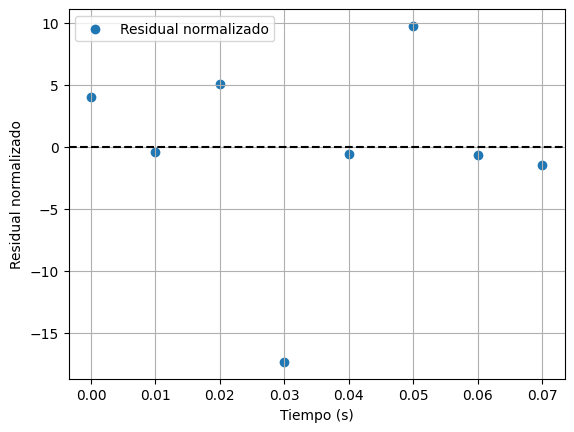

In [65]:
residuals = (v - (param[0]*t + param[1]))/error

plt.scatter(t, residuals, label='Residual normalizado')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Residual normalizado')
plt.legend()
plt.grid()

**5.**

In [67]:
l = 92.3 / 100 #m
l_err = 0.1 / 100 #m
T = 1.936
T_err = 0.004

g = (T/(2*np.pi))**(-2) * l
g_err = np.sqrt( (T_err * (8 * np.pi**2 / (T**3)))**2 + (l_err * 4 * np.pi**2 / (T**2))**2 )
print('g = ' + str(np.round(g,3)) + ' ± ' + str(np.round(g_err,3)))


g = 9.722 ± 0.045
